In [44]:
# This code will implement a baseline, very simple, Perceptron to classify points in 2D space 

In [45]:
import numpy as np 
import matplotlib.pyplot as plt

In [46]:
# Very simple neural network that works on classifying things from the wheat and seeds dataset 
"""In general there are X stages we go through to make a fully functional neural network:
1) Initialise the network 
2) Forward Propagate
3) Back Propagate the error
4) Train Network (i.e. update the weights with training data)
5) Predict on test data
"""


'In general there are X stages we go through to make a fully functional neural network:\n1) Initialise the network \n2) Forward Propagate\n3) Back Propagate the error\n4) Train Network (i.e. update the weights with training data)\n5) Predict on test data\n'

In [47]:
# define input features
print ("hello world 2")
np.random.seed(2)
num = 10000
# Creating a random array of x , y points 
x = np.random.randn(num)*50
y = np.random.randn(num)*50
# Defining a cut off line to split the points into two sections 
x_line = np.linspace(-150,150,x.size)
y_line = (1.5*x_line-25)

hello world 2


In [48]:
# Generating a third column based on the position of the points on the 2D grid
z = np.zeros((len(x),1))
z[(1.5*x-25 > y)] = 1

In [49]:
# Concatenating x,y,z into the fully labelled dataset
x = x.reshape(x.size,1)
y = y.reshape(y.size,1)
z = z.reshape(z.size,1)
data = np.concatenate([x,y,z],axis=1)
# Extracting test data from the full dataset
# Specifying a percentage of the full dataset
train_perc = 20
train_data = data[0:round(len(data)*train_perc/100),:]
# Extracting test data
test_data = data[round(len(data)*train_perc/100)::,:]

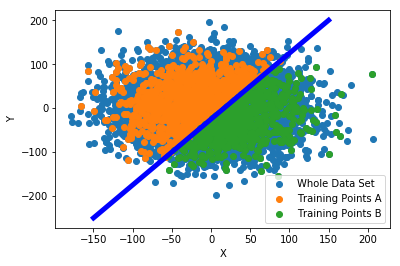

In [50]:
# Plotting test data
td1 = train_data[(train_data[:,2]==0)] 
td2 = train_data[(train_data[:,2]==1)] 
plt.scatter(x,y,label='Whole Data Set')
plt.scatter(td1[:,0],td1[:,1],label='Training Points A')
plt.scatter(td2[:,0],td2[:,1],label='Training Points B')
plt.plot(x_line,y_line,'b',linewidth=5)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

In [51]:
# Extracting input features from test data (i.e. x,y locations)
input_feats = train_data[:,(0,1)]
print (input_feats.shape)
print (input_feats)

(2000, 2)
[[ -20.83789237  -40.40893038]
 [  -2.81334136  -26.50126648]
 [-106.80980478  -14.52013077]
 ...
 [  43.42566111  -36.40168602]
 [  -6.0926382    45.37803051]
 [  37.81107825   30.98609673]]


In [52]:
# Defining expected outputs (i.e. 0/1 depending on where the points lie)
target = train_data[:,2]
target = target.reshape(input_feats.shape[0],1)
print (target.shape)
print (target)

(2000, 1)
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [1.]]


In [53]:
# Create weights
np.random.seed(1)
weights = np.random.randn(2,1)
#weights = np.array([[0.1],[0.2]])

print (weights.shape)
weights

(2, 1)


array([[ 1.62434536],
       [-0.61175641]])

In [54]:
# Defining bias 
np.random.seed(1)

bias = np.random.random()*2
bias

0.834044009405148

In [55]:
# Sigmoid activation function 
def sigmoid(X): 
    out = 1/(1+np.exp(-X))
    return out 

In [56]:
# Derivative of sigmoid activation function (used in the gradient descent back propagation)
def sigmoid_der(X):  
    out = sigmoid(X)*(1-sigmoid(X))
    return out

In [57]:
def train(input_feats, weights, bias, target, l_rate, epoch):
    
    cost = np.zeros((epoch,1))
    accuracy = np.zeros((epoch,1))
    
    weights_run = weights
    bias_run = bias
    
    for epoch in np.arange(0,epoch):
        # Feed forward
        a = np.dot(input_feats,weights_run)+bias_run
        # Pass through activation
        z = sigmoid(a)
        # Calculating cost value for the network 
        cost[epoch] = np.sum((z-target))
        
        # Calculating the accuracy for the network through the epochs
        
        y_hat = np.round(z)
        correct = target[(target==y_hat)]
        accuracy[epoch] = (len(correct)/len(target))*100        
        # Calculating the error vector 
        error = z - target
        # Calculating deriv
        deriv = (error * sigmoid_der(z))
        # Calculating dError/dWeights
        dE_dw = np.dot(input_feats.T,deriv)
        # Updating weights 
        weights_run -=(l_rate * dE_dw)
        # Updating bias
        for i in deriv:
            bias_run -= l_rate * i
        
    return accuracy, cost, weights_run, bias_run

Text(0, 0.5, 'Accuracy')

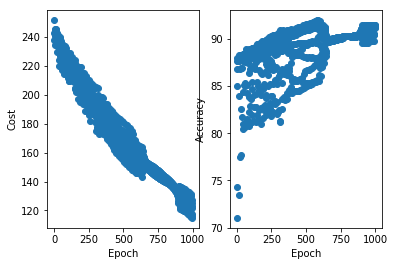

In [58]:
epoch = 1000
epochs = range(epoch)
accuracy, cost, weights_run , bias_run = train((input_feats), weights, bias, target, 0.001, epoch)

plt.subplot(121)
plt.scatter(epochs,cost)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.subplot(122)
plt.scatter(epochs, accuracy)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [70]:
epoch = 1000
epochs = range(epoch)
# Normalising inputs to ensure stability
norm_input = (input_feats)/np.max(input_feats)
accuracy, cost, weights_run , bias_run = train(norm_input, weights, bias, target, 0.001, epoch)



Text(0, 0.5, 'Accuracy')

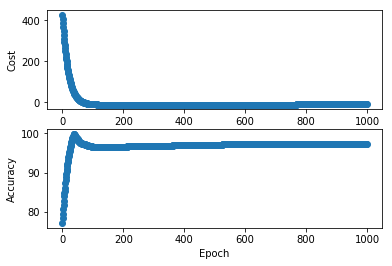

In [71]:
plt.subplot(211)
plt.scatter(epochs,cost)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.subplot(212)
plt.scatter(epochs, accuracy)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [72]:
print (weights_run)
print (bias_run)

[[14.43650561]
 [-9.63158166]]
[-1.41558886]


In [73]:
# Testing on data

In [74]:
test_row = 2780
test = test_data[test_row,:]
test_point = test_data[test_row,(0,1)] 
print ("Test point = (%s, %s), Expected output = %s" %(test_data[test_row,0],test_data[test_row,1],test_data[test_row,2]))

Test point = (-46.87879475256745, 1.4286225103253558), Expected output = 0.0


In [75]:
# test_features 
test_feats = test_data[:,(0,1)]
norm_test_feats = test_feats/np.max(test_feats)
test_target = test_data[:,2]

In [76]:
# Forward propagating
a = np.dot(norm_test_feats, weights_run) + bias_run

# Activation function 
z_train = sigmoid(a)

In [77]:
test_target = test_target.reshape(len(test_feats),1)
#z_train = z_train.reshape(9000,1)
print (np.concatenate([test_target,z_train,test_target - z_train],axis=1))

[[ 1.          0.9717201   0.0282799 ]
 [ 1.          0.89213401  0.10786599]
 [ 0.          0.0326516  -0.0326516 ]
 ...
 [ 0.          0.14389508 -0.14389508]
 [ 0.          0.1099676  -0.1099676 ]
 [ 1.          0.98444795  0.01555205]]


In [78]:
round_train = np.round(z_train)
error = (test_target - z_train)
round_error = (np.round(error))
MSE = np.sum(pow(round_error,2))/len(test_data)
MAE = np.mean(abs(round_error))
print ("MSE = %s"%(MSE))
print ("MAE = %s"%(MAE))

MSE = 0.02375
MAE = 0.02375


In [79]:
# Getting correct predictions
correct = test_target[(test_target==round_train)]
accuracy = (len(correct)/len(test_target))*100
print ("Accuracy = %s percent"%(accuracy))

Accuracy = 97.625 percent


In [80]:
""" Other things to do: 
 - Confusion matrix 
 - Variable learning rate with value of gradient
 - Multi-layer NN """



' Other things to do: \n - Confusion matrix \n - Variable learning rate with value of gradient\n - Multi-layer NN '